In [1]:
import sys
sys.path.append("..")

In [2]:
from ethicml.algorithms.inprocess import LR, SVM, Majority, ZafarAccuracy, ZafarFairness, Kamiran, Agarwal, ZafarEqOpp
from ethicml.metrics import Accuracy, AbsCV, ProbPos, TPR, TNR, F1, BalancedAccuracy
from ethicml.preprocessing import BalancedTestSplit, ProportionalSplit
from ethicml.evaluators import evaluate_models_async, load_results
from ethicml.data import Adult, load_data, Compas
from ethicml.visualisation import plot_results
from ethicml.utility import Results

In [3]:
from ethicml_models import EOFlags, DPFlags, TrainTrainSplit, TuningLr, TPRRatio, GPyTDemPar, GPyTEqOdds, GPyT

In [4]:
use_s = False
results = await evaluate_models_async(
    datasets=[
        Compas("Sex"),
        Compas("Race"),
    ],
    inprocess_models=[
        LR(),
#         SVM(),
#         Majority(),
#         ZafarAccuracy(),
        ZafarFairness(),
        ZafarEqOpp(),
        Kamiran(),
        Agarwal("DP"),
        Agarwal("EqOd"),

        TuningLr(use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.1, target_rate_s1=0.1), use_s=use_s),
        TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.2, target_rate_s1=0.2), use_s=use_s),
        TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.3, target_rate_s1=0.3), use_s=use_s),
        TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.4, target_rate_s1=0.4), use_s=use_s),
        TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.5, target_rate_s1=0.5), use_s=use_s),
        TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.6, target_rate_s1=0.6), use_s=use_s),
        TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.7, target_rate_s1=0.7), use_s=use_s),
        TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.8, target_rate_s1=0.8), use_s=use_s),
        TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.9, target_rate_s1=0.9), use_s=use_s),
    ],
    metrics=[Accuracy(), AbsCV(), F1(), TPRRatio(), ProbPos(), TPR(), TNR(), BalancedAccuracy()],
    per_sens_metrics=[Accuracy(), ProbPos(), TPR(), TNR()],
    repeats=10,
    delete_prev=False,
    splitter=ProportionalSplit(),
    topic="eq_normal_test_10repeats",
    max_parallel=3,
)

synchronous algorithms...


100%|██████████| 40/40 [00:02<00:00, 17.52it/s, model=Kamiran & Calders LR, dataset=Compas Race - Train (9)]

asynchronous algorithms...



100%|██████████| 260/260 [41:12<00:00,  9.51s/it, model=TuningLR, wd: 0.1, RAdam, PR_t: 0.9, dataset=Compas Race - Train (9), worker_id=2]


In [7]:
results.data

Accuracy  \
dataset     transform    model                               split_id             
Compas Sex  no_transform Logistic Regression, C=1.0          0         0.677472   
                         SVM                                 0         0.682334   
                         Majority                            0         0.544571   
                         ZafarFairness, c=0.001              0         0.666937   
                         ZafarEqOpp, τ=5.0, μ=1.2            0         0.666126   
...                                                                         ...   
Compas Race no_transform TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4         0.622871   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4         0.643147   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4         0.662612   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.5 4         0.667478   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.6 4         0.652879   

                                                                       Accuracy_sex_0  \
dataset     transform    model                               split_id                   
Compas Sex  no_transform Logistic Regression, C=1.0          0               0.714894   
                         SVM                                 0               0.723404   
                         Majority                            0               0.646809   
                         ZafarFairness, c=0.001              0               0.697872   
                         ZafarEqOpp, τ=5.0, μ=1.2            0               0.680851   
...                                                                               ...   
Compas Race no_transform TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                    NaN   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                    NaN   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                    NaN   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.5 4                    NaN   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.6 4                    NaN   

                                                                       Accuracy_sex_0-sex_1  \
dataset     transform    model                               split_id                         
Compas Sex  no_transform Logistic Regression, C=1.0          0                     0.046225   
                         SVM                                 0                     0.050732   
                         Majority                            0                     0.126288   
                         ZafarFairness, c=0.001              0                     0.038213   
                         ZafarEqOpp, τ=5.0, μ=1.2            0                     0.018188   
...                                                                                     ...   
Compas Race no_transform TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                          NaN   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                          NaN   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                          NaN   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.5 4                          NaN   
                         TuningLR, wd: 0.1, RAdam, PR_t: 0.6 4                          NaN   

                                                                       Accuracy_sex_0/sex_1  \
dataset     transform    model                               split_id                         
Compas Sex  no_transform Logistic Regression, C=1.0          0                     0.935340   
                         SVM                                 0                     0.929871   
                         Majority                            0                     0.804752   
                         ZafarFairness, c=0.001              0                     0.945244   
                         Za

In [6]:
results = load_results("Adult Sex", "no_transform", topic="baselines_balanced_test")

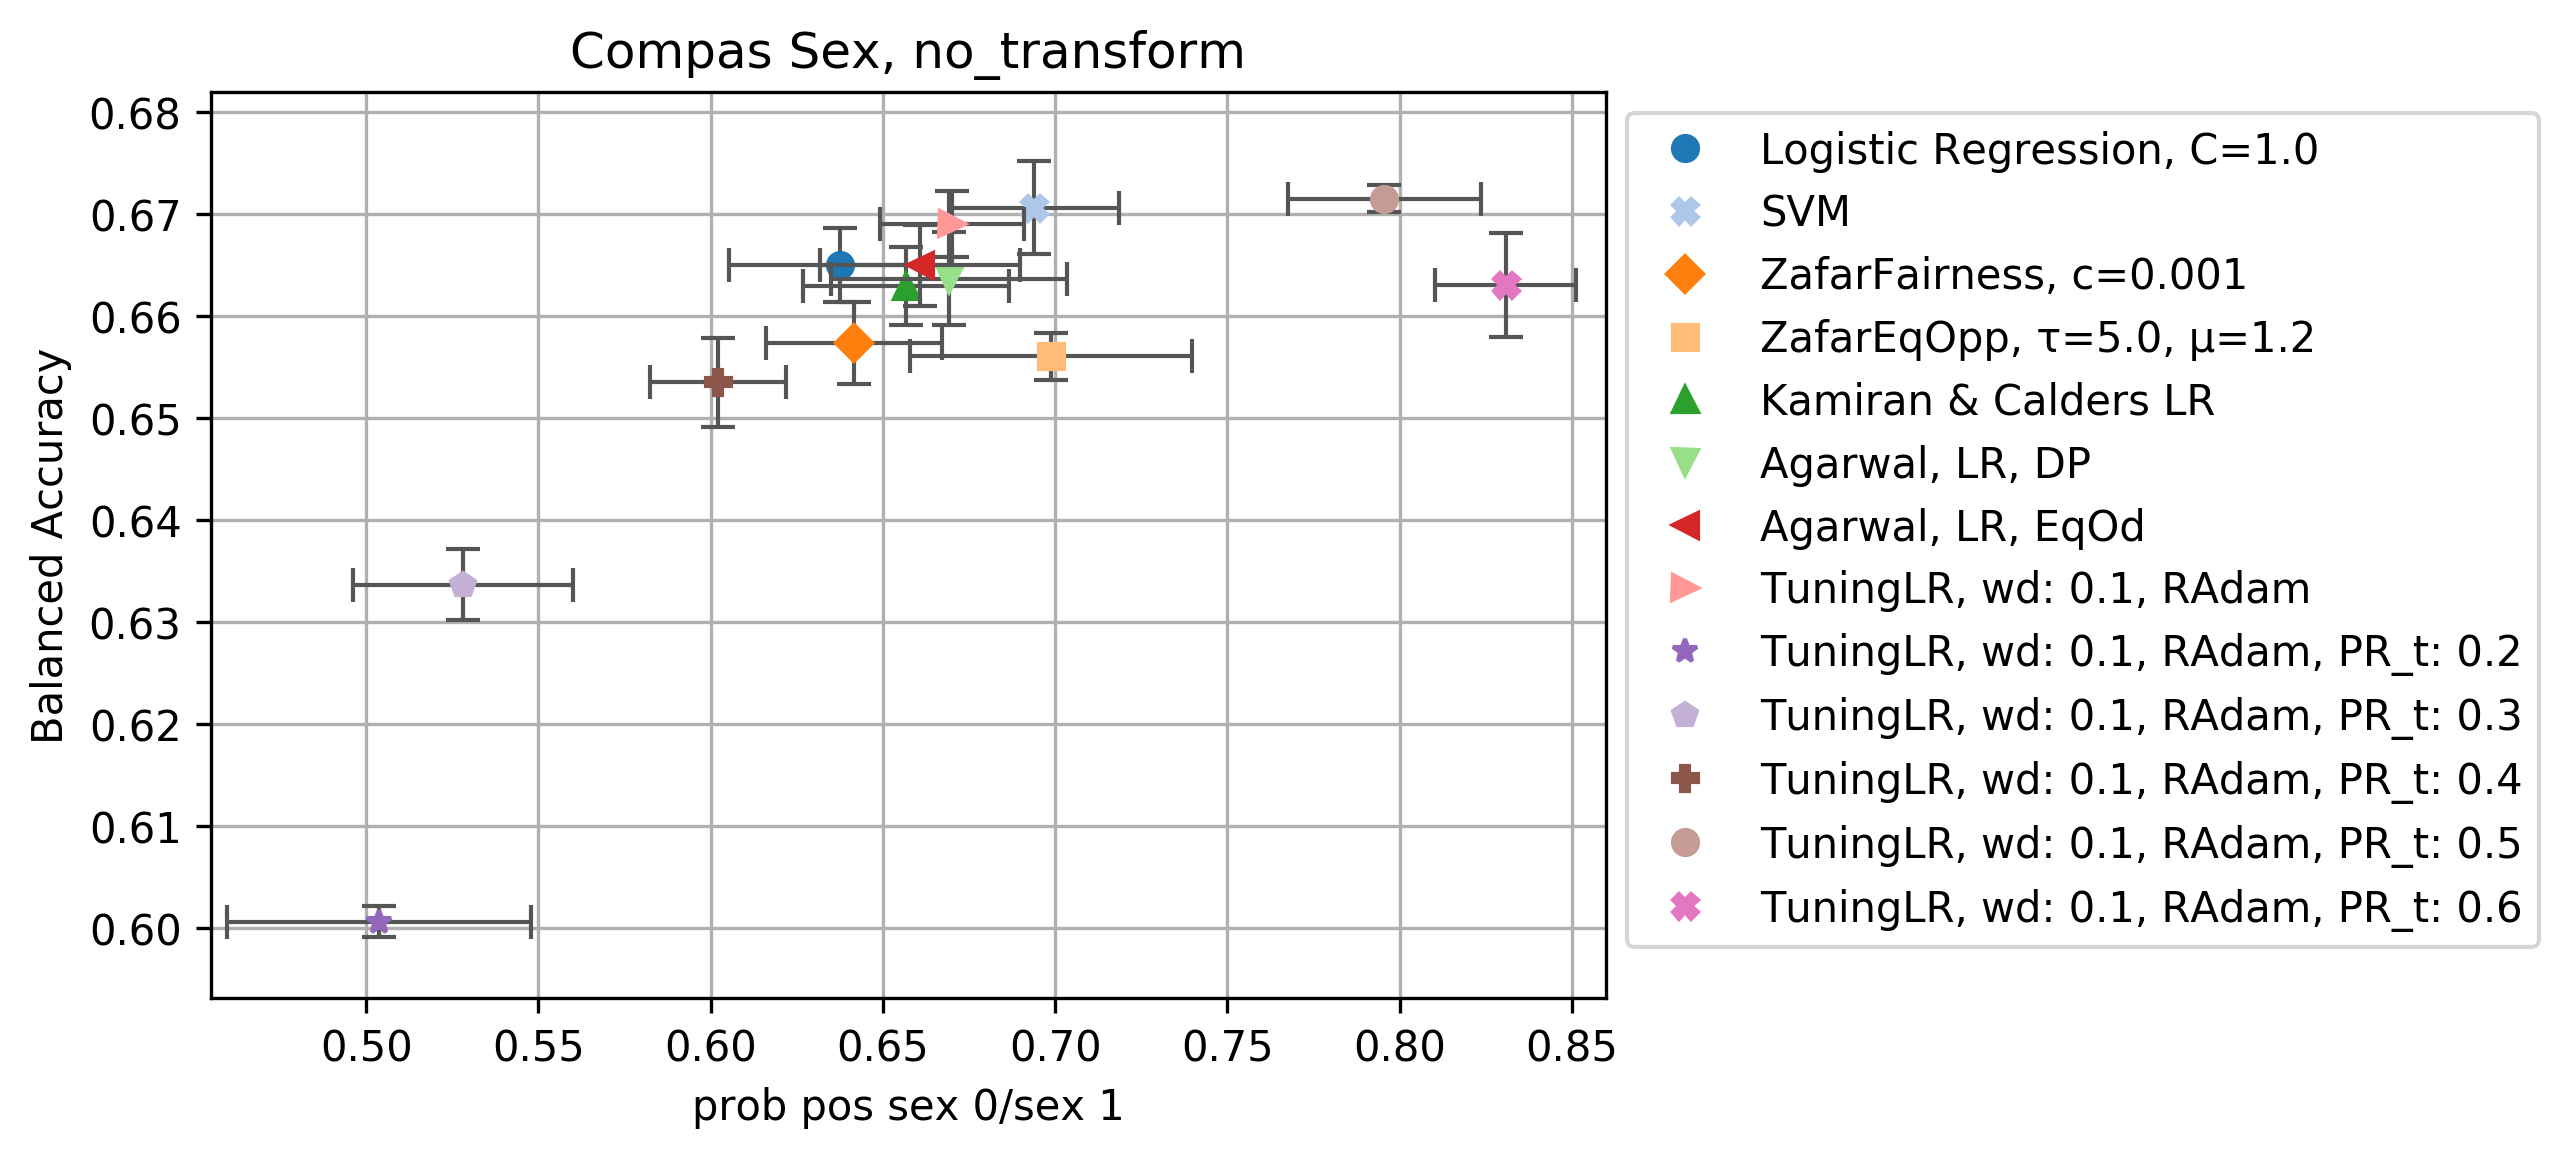

In [8]:
(fig, plot), = plot_results(Results(results.data.query("model != 'ZafarAccuracy, γ=0.5'")), "Balanced Accuracy", "prob_pos_sex_0/sex_1", ptype="cross")
fig

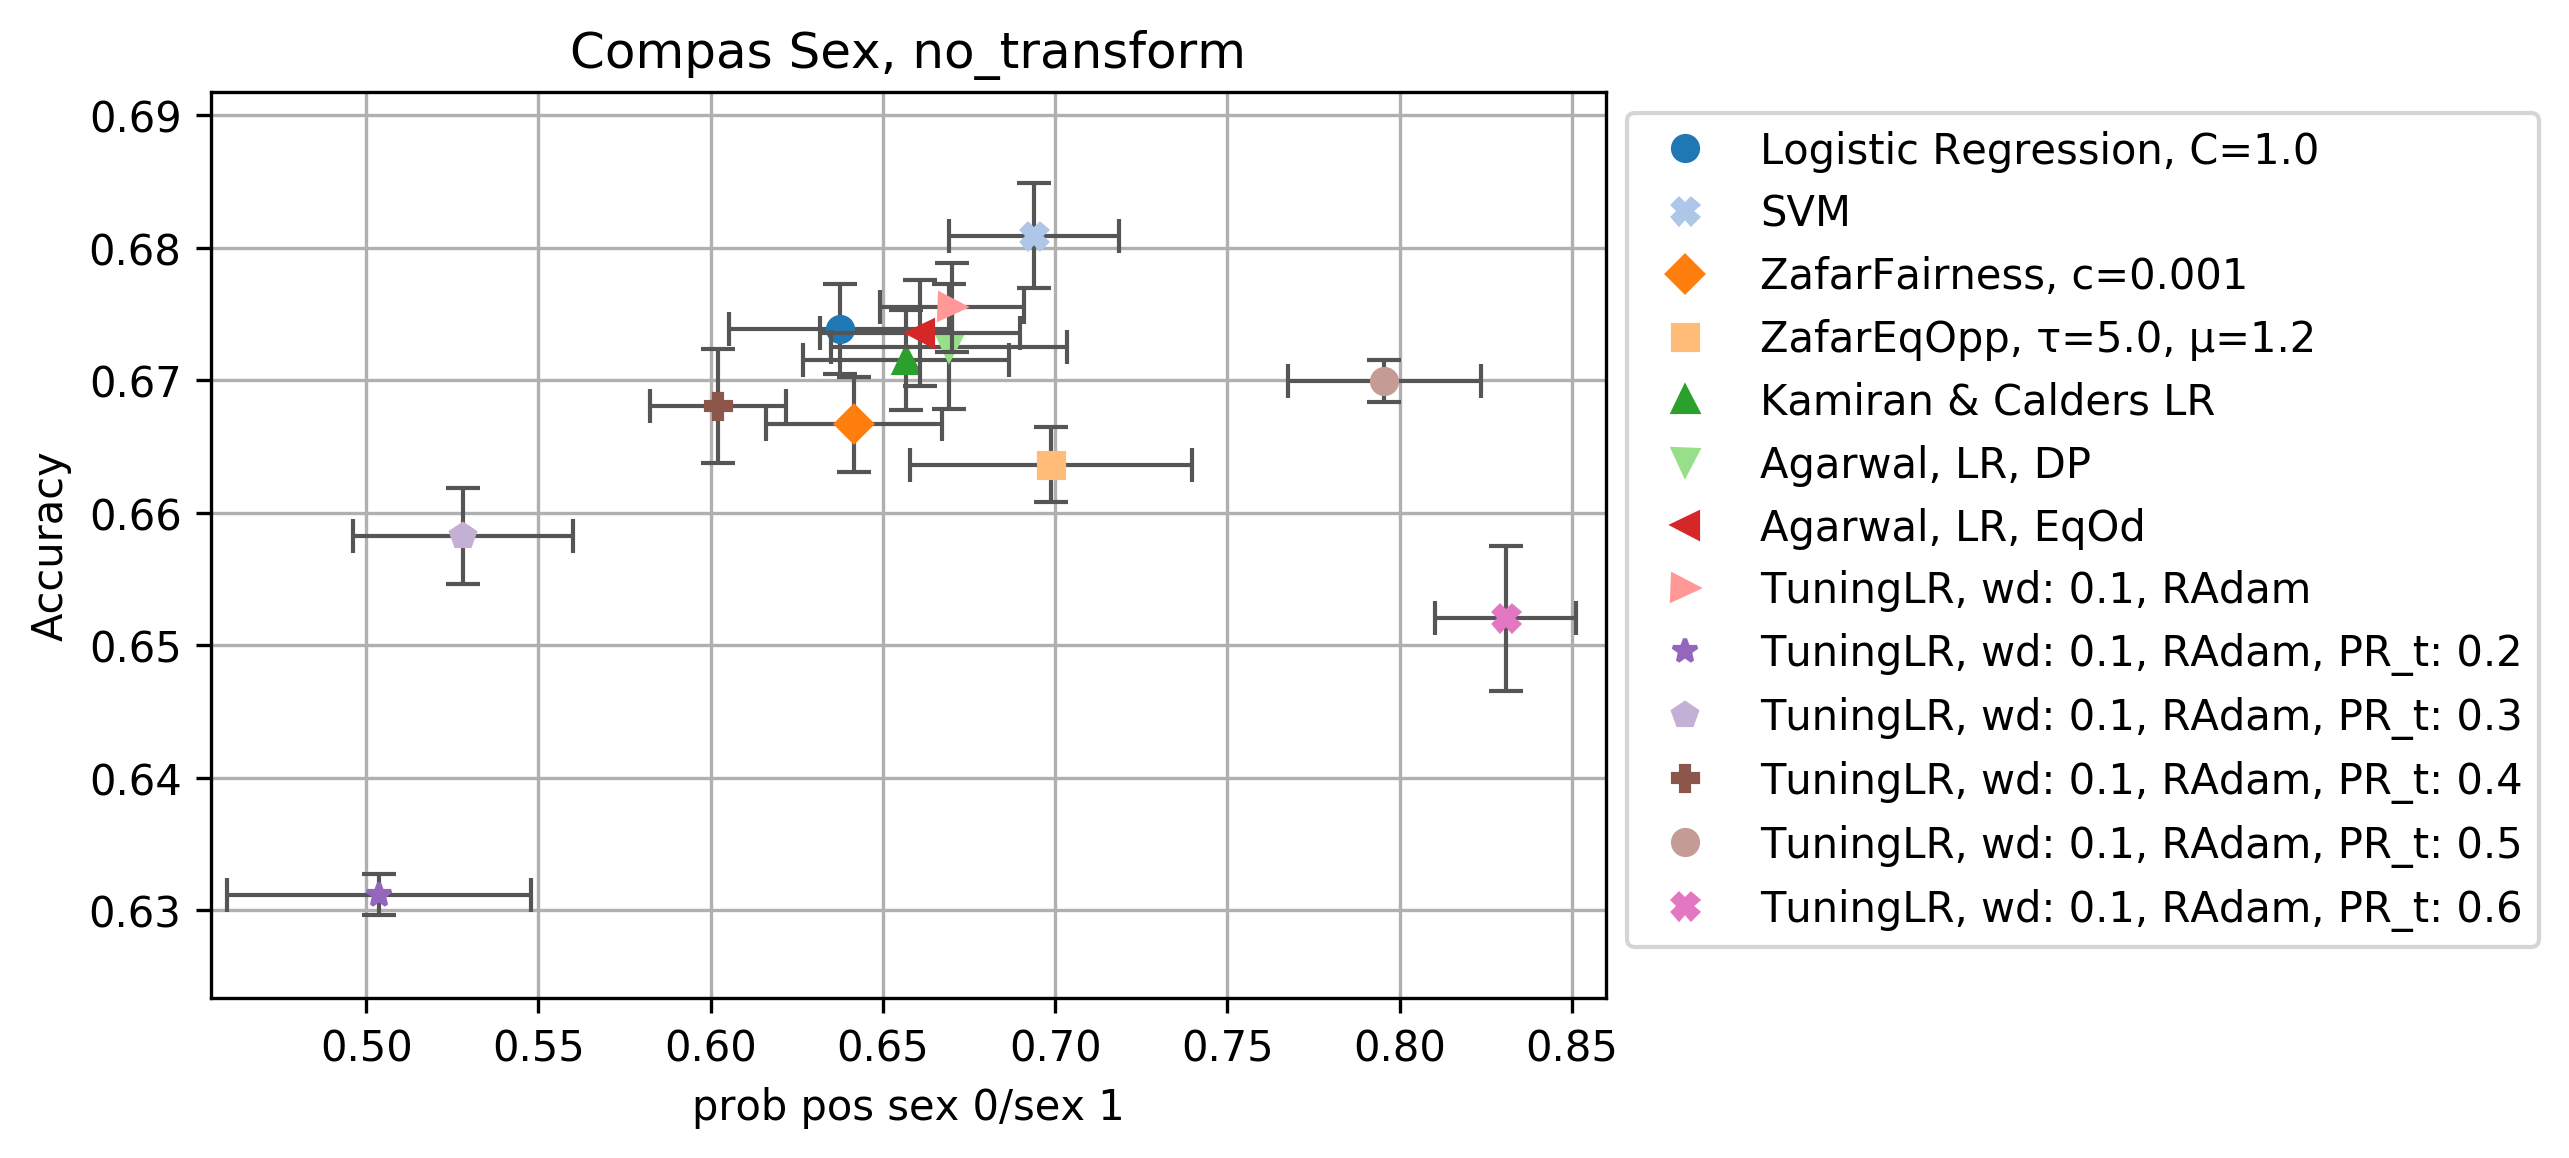

In [11]:
(fig, plot), = plot_results(Results(results.data.query("model != 'ZafarAccuracy, γ=0.5'")), "Accuracy", "prob_pos_sex_0/sex_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(results, "F1", "prob_pos_sex_0/sex_1", ptype="cross")
fig

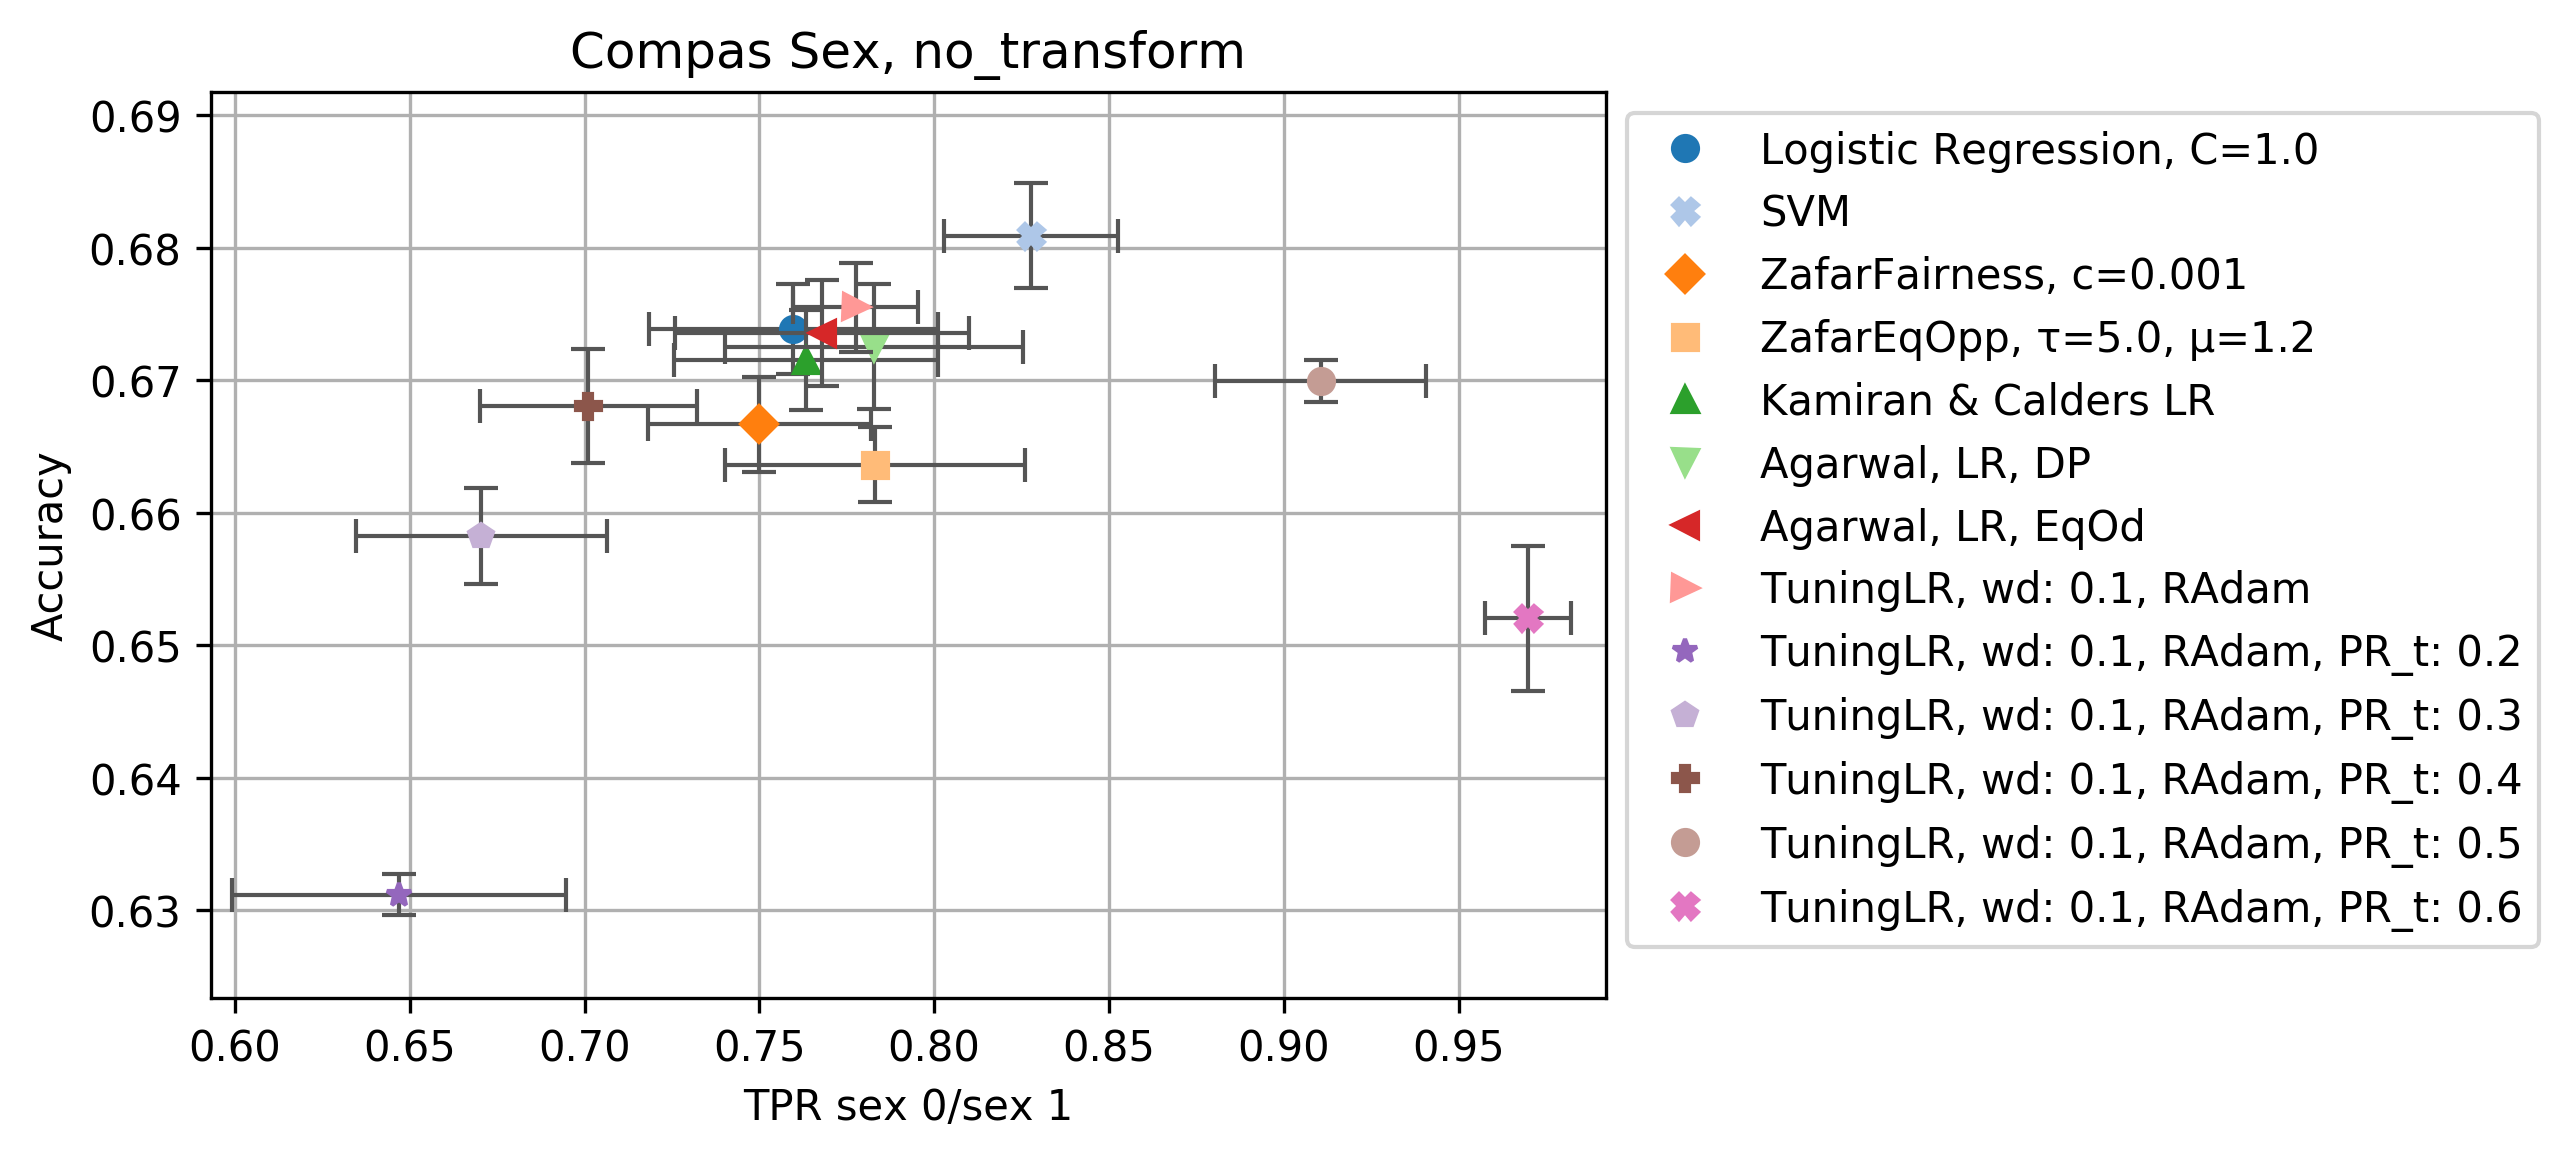

In [10]:
(fig, plot), = plot_results(Results(results.data.query("model != 'ZafarAccuracy, γ=0.5'")), "Accuracy", "TPR_sex_0/sex_1", ptype="cross")
fig

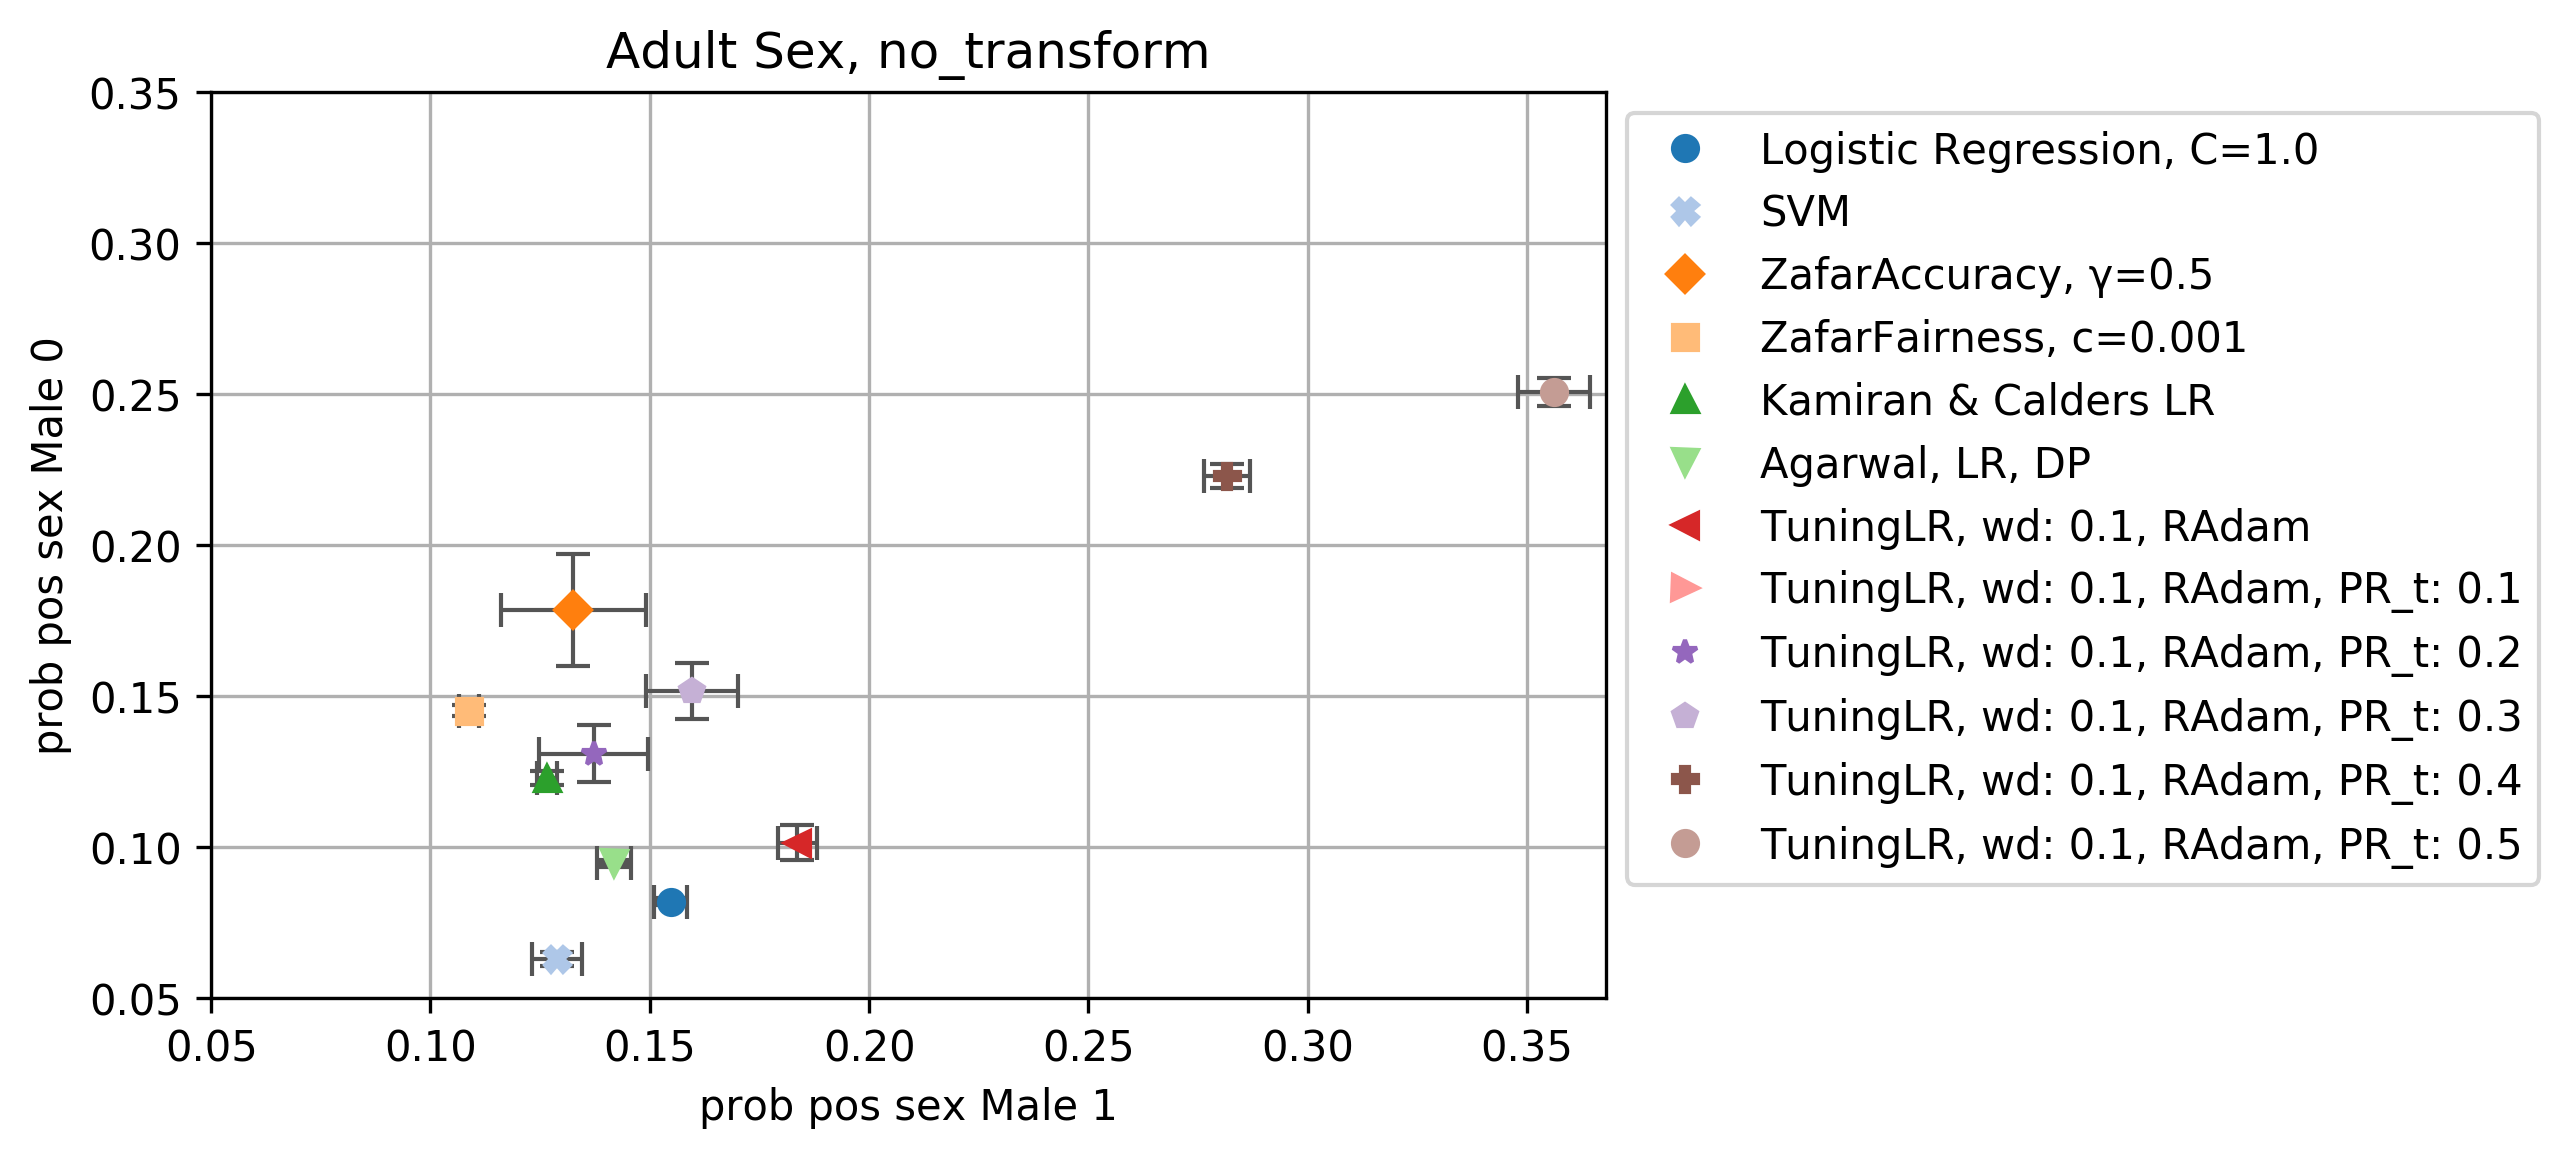

In [18]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "prob_pos_sex_Male_0", "prob_pos_sex_Male_1", ptype="cross")

plot.set_ylim((0.05, 0.35))
fig

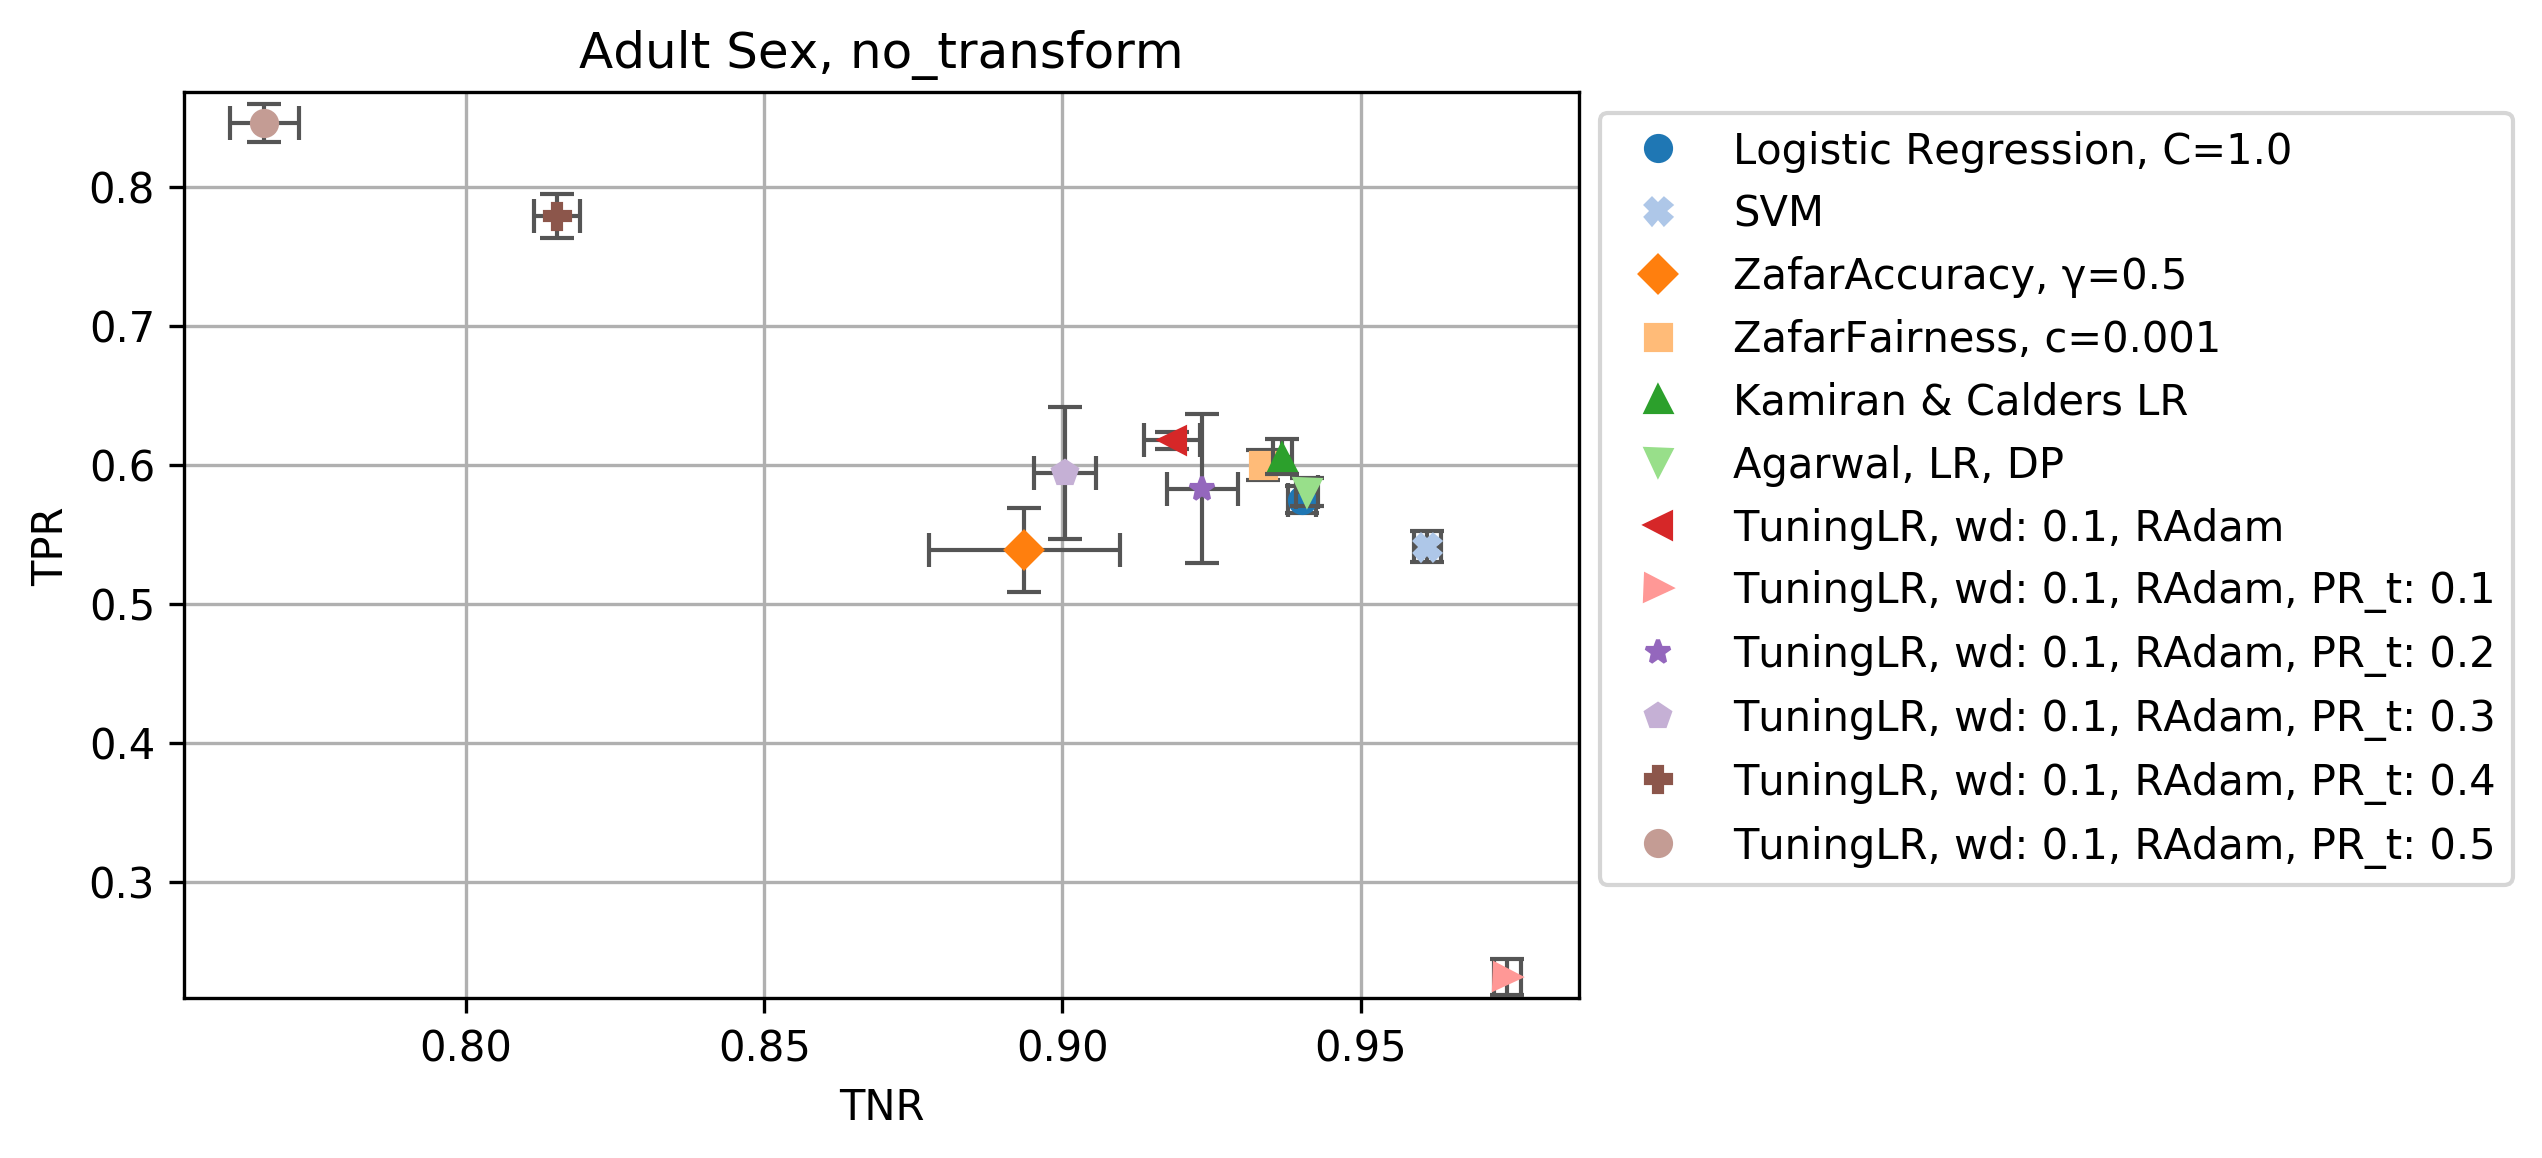

In [23]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "TPR", "TNR", ptype="cross")

# plot.set_ylim((0.05, 0.35))
fig

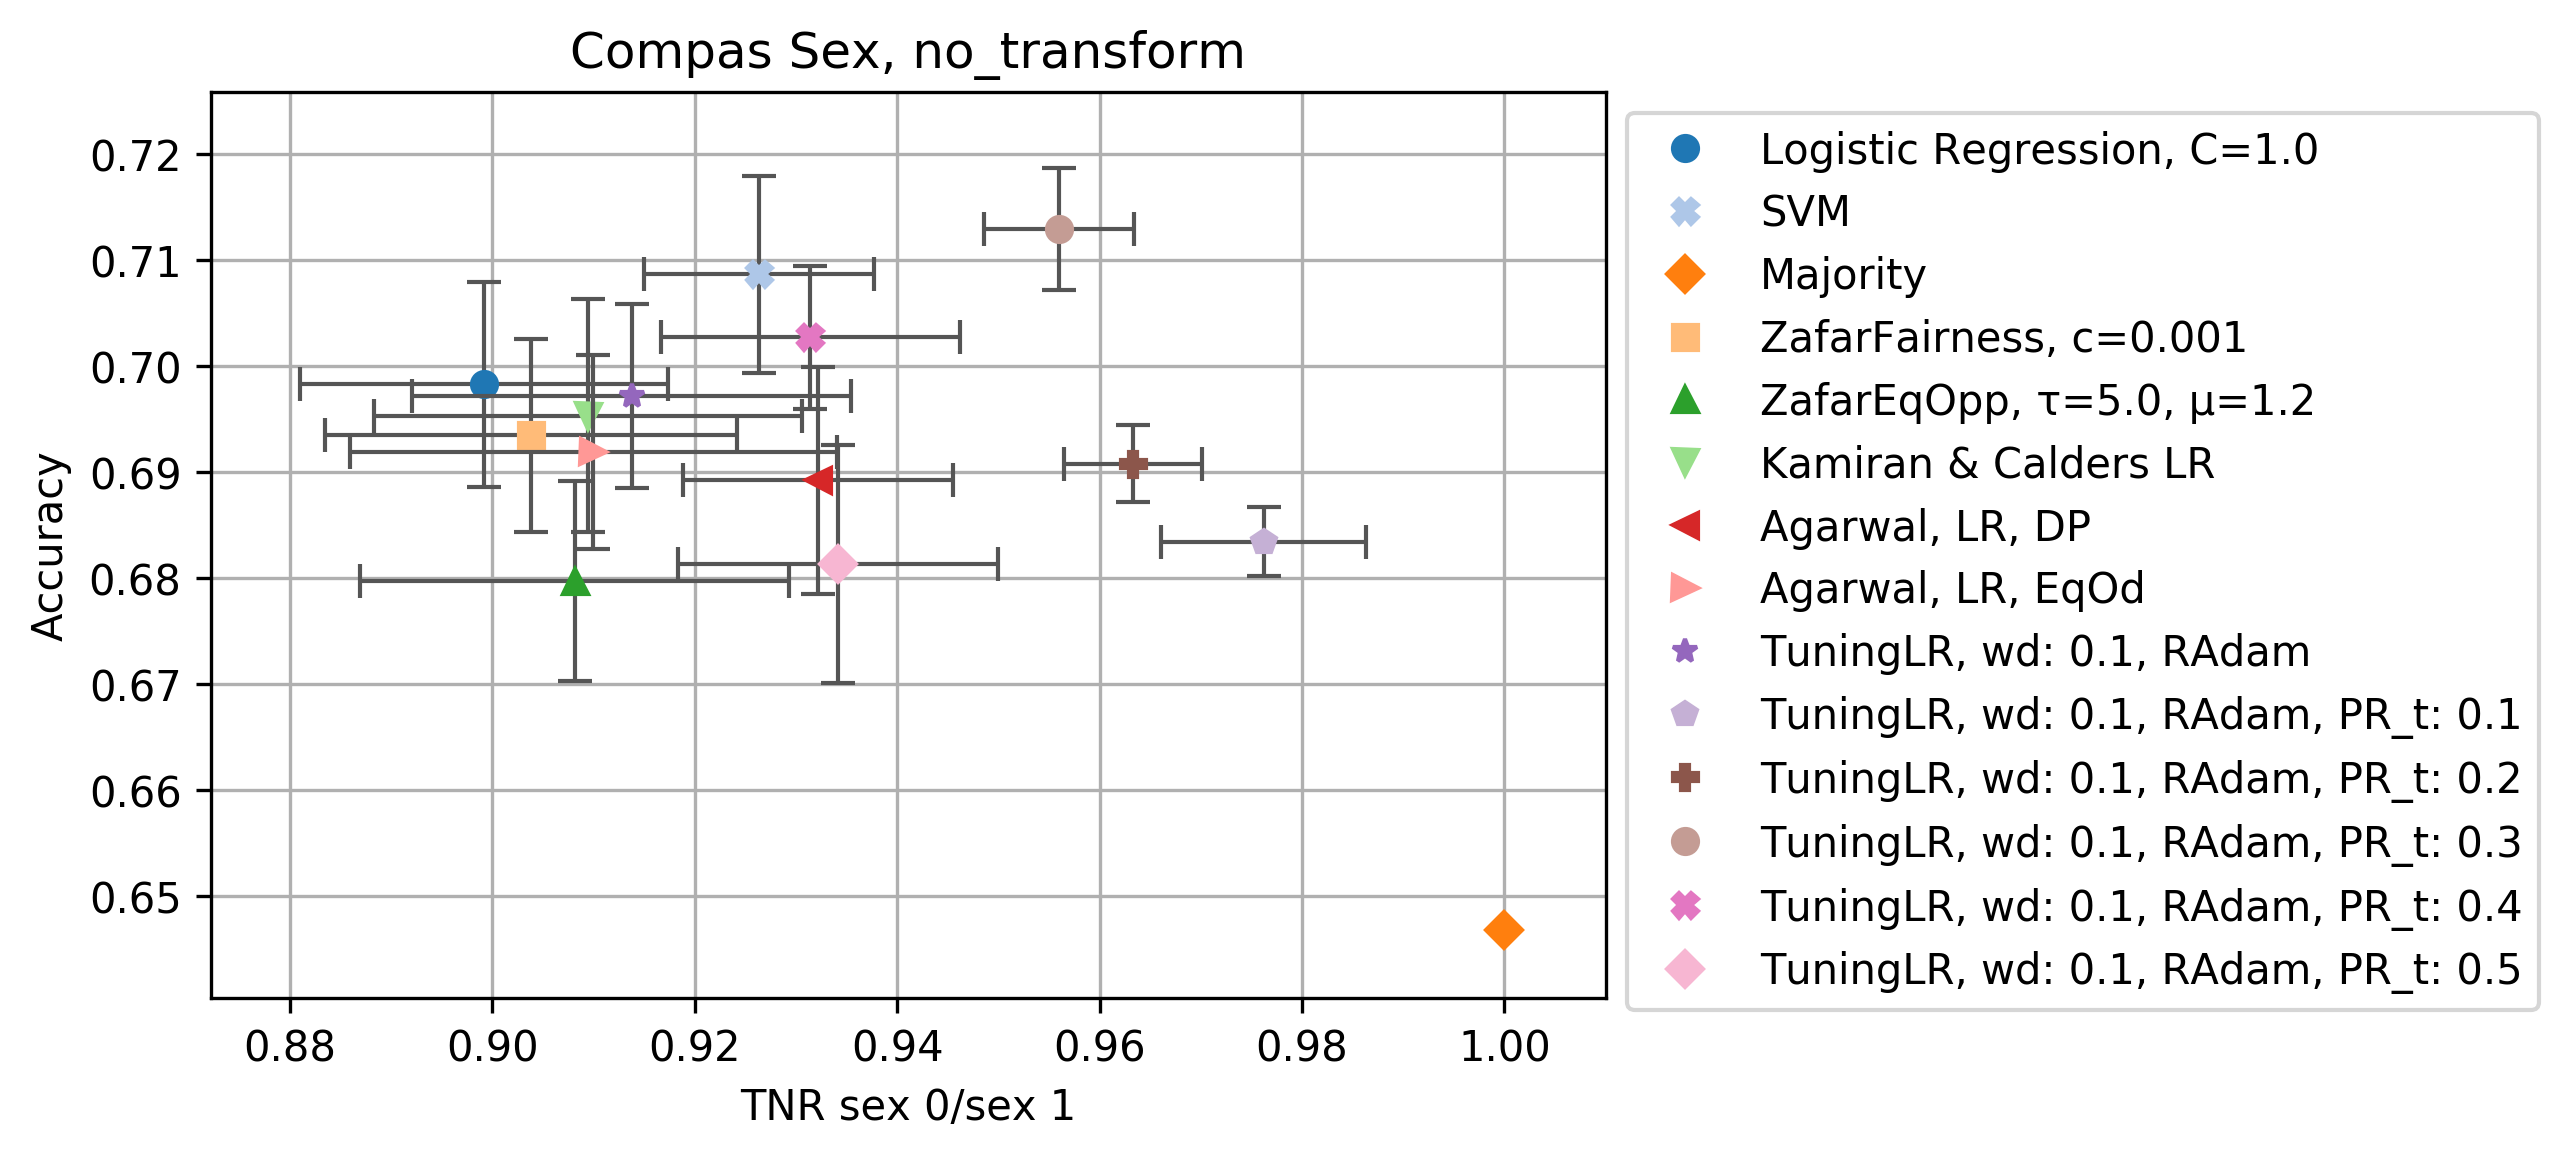

In [11]:
(fig, plot), = plot_results(Results(results.data.query("model != 'ZafarAccuracy, γ=0.5'")), "Accuracy", "TNR_sex_0/sex_1", ptype="cross")
fig

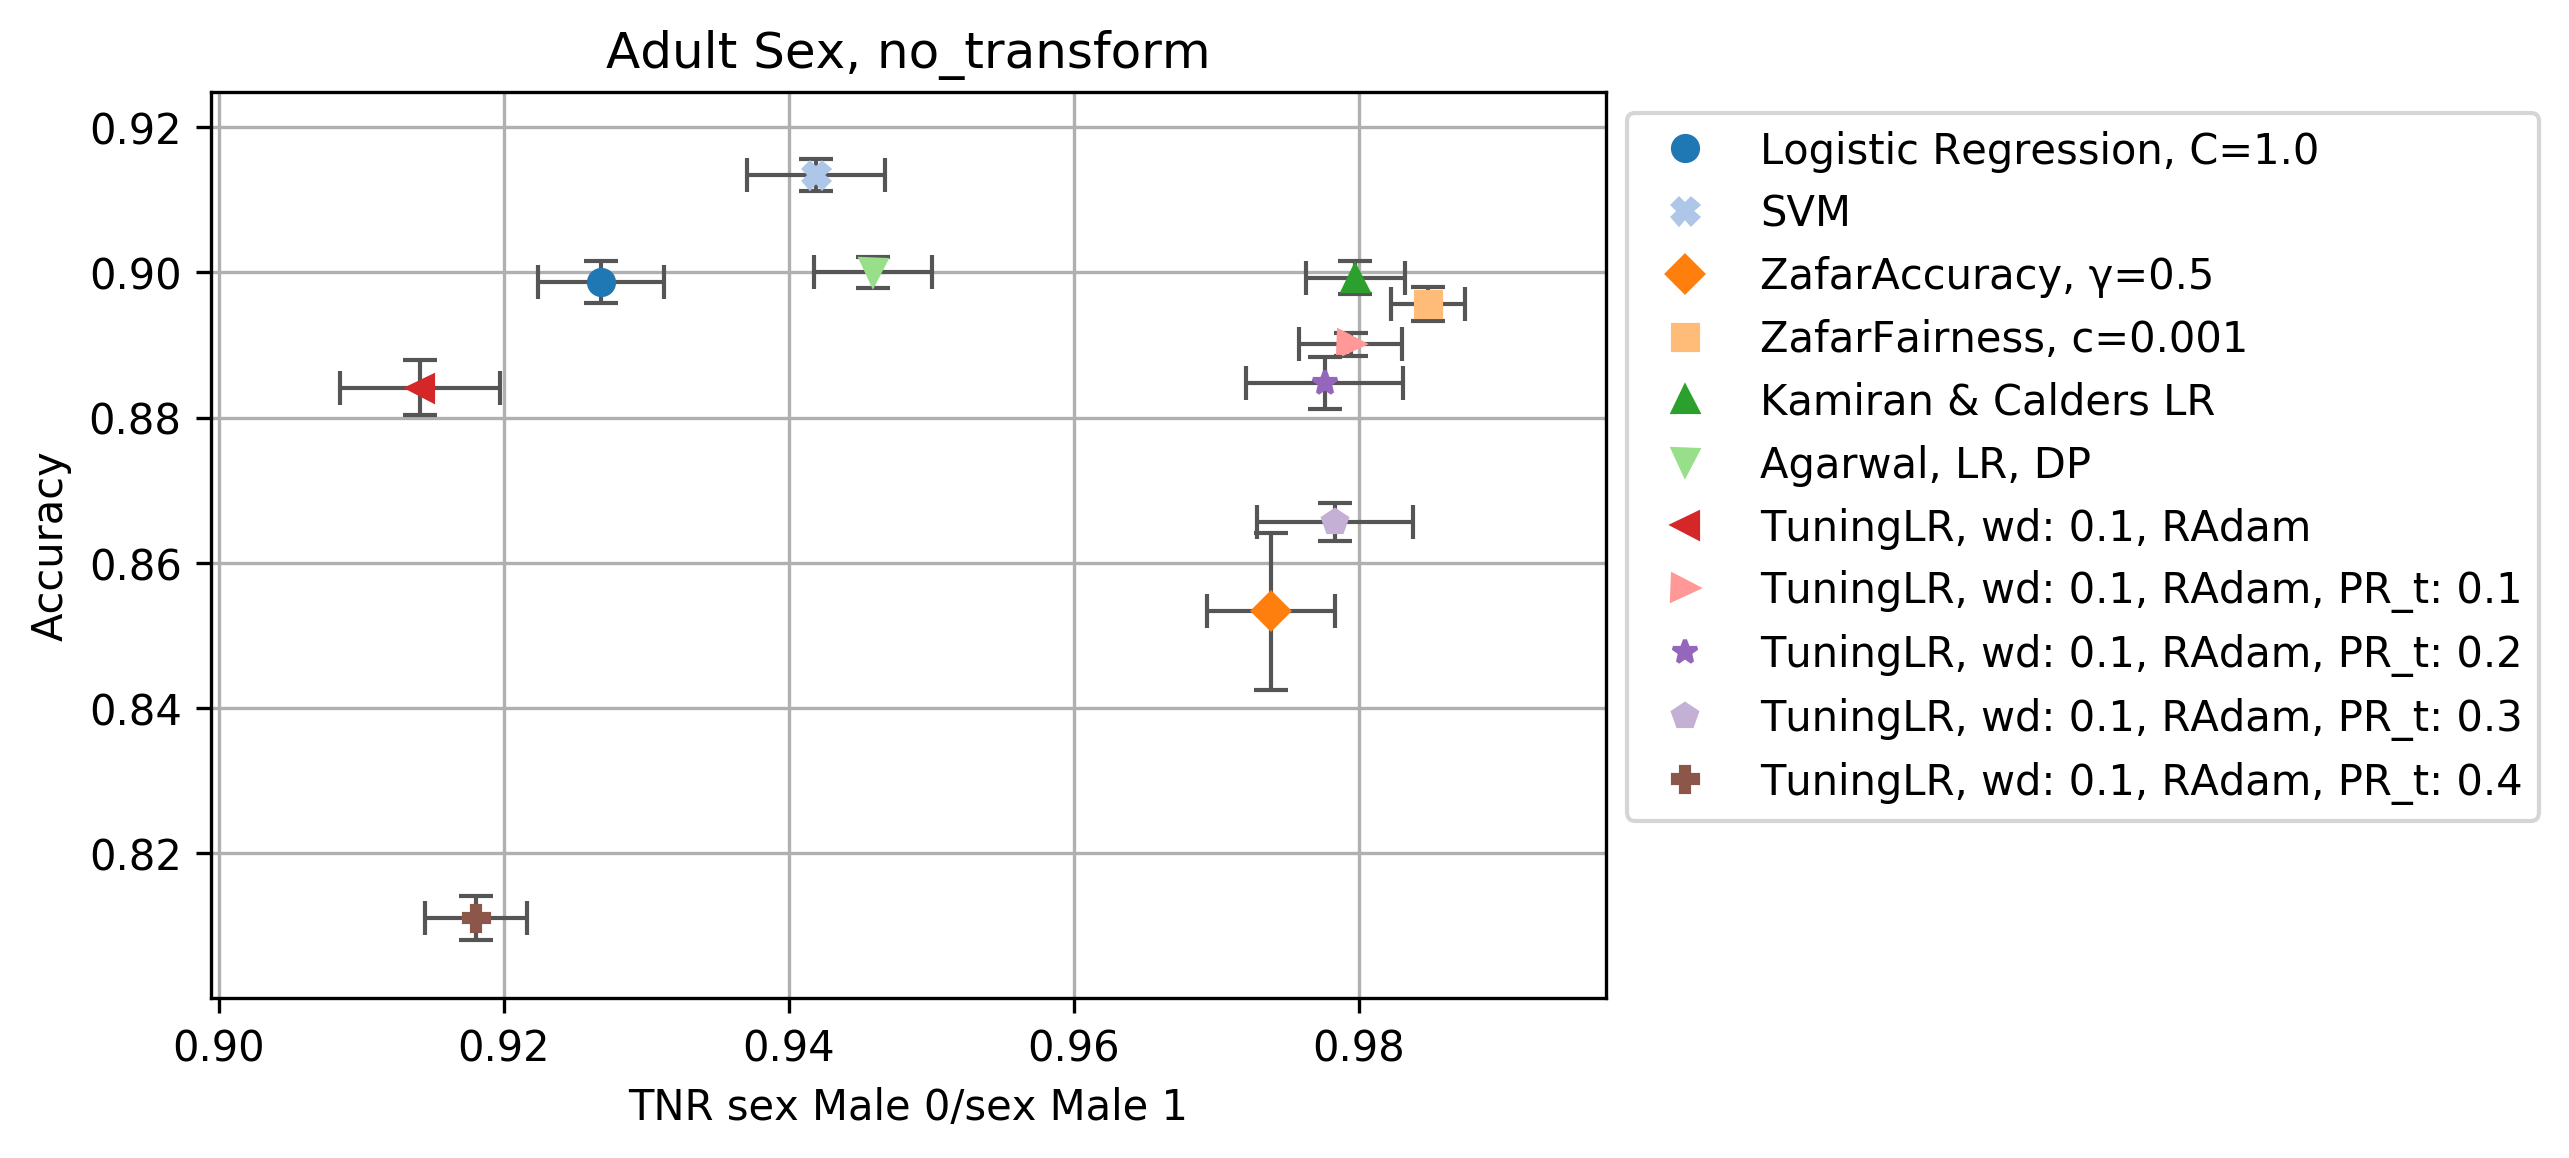

In [11]:
results_temp = Results(results.data.query("model != 'TuningLR, wd: 0.1, RAdam, PR_t: 0.5' & model != 'Majority'"))
(fig, plot), = plot_results(results_temp, "Accuracy", "TNR_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [21]:
results_temp.data

Accuracy  \
dataset   transform    model                               split_id             
Adult Sex no_transform Logistic Regression, C=1.0          4         0.898775   
                       SVM                                 4         0.909323   
                       ZafarAccuracy, γ=0.5                4         0.862368   
                       ZafarFairness, c=0.001              4         0.900476   
                       Kamiran & Calders LR                4         0.899626   
...                                                                       ...   
                       TuningLR, wd: 0.1, RAdam            4         0.878530   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4         0.887547   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4         0.877339   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4         0.859986   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4         0.804866   

                                                                     Accuracy_sex_Male_0  \
dataset   transform    model                               split_id                        
Adult Sex no_transform Logistic Regression, C=1.0          4                    0.921742   
                       SVM                                 4                    0.927526   
                       ZafarAccuracy, γ=0.5                4                    0.862198   
                       ZafarFairness, c=0.001              4                    0.902007   
                       Kamiran & Calders LR                4                    0.910854   
...                                                                                  ...   
                       TuningLR, wd: 0.1, RAdam            4                    0.920041   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4                    0.900987   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                    0.896563   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                    0.876489   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                    0.838721   

                                                                     Accuracy_sex_Male_0-sex_Male_1  \
dataset   transform    model                               split_id                                   
Adult Sex no_transform Logistic Regression, C=1.0          4                               0.045934   
                       SVM                                 4                               0.036407   
                       ZafarAccuracy, γ=0.5                4                               0.000340   
                       ZafarFairness, c=0.001              4                               0.003062   
                       Kamiran & Calders LR                4                               0.022457   
...                                                                                             ...   
                       TuningLR, wd: 0.1, RAdam            4                               0.083021   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4                               0.026880   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                               0.038448   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                               0.033004   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                               0.067710   

                                                                     Accuracy_sex_Male_0/sex_Male_1  \
dataset   transform    model                               split_id                                   
Adult Sex no_transform Logistic Regression, C=1.0          4                               0.950166   
                       SVM                                 4                               0.960748   
                       ZafarAccuracy, γ=0.5                4      

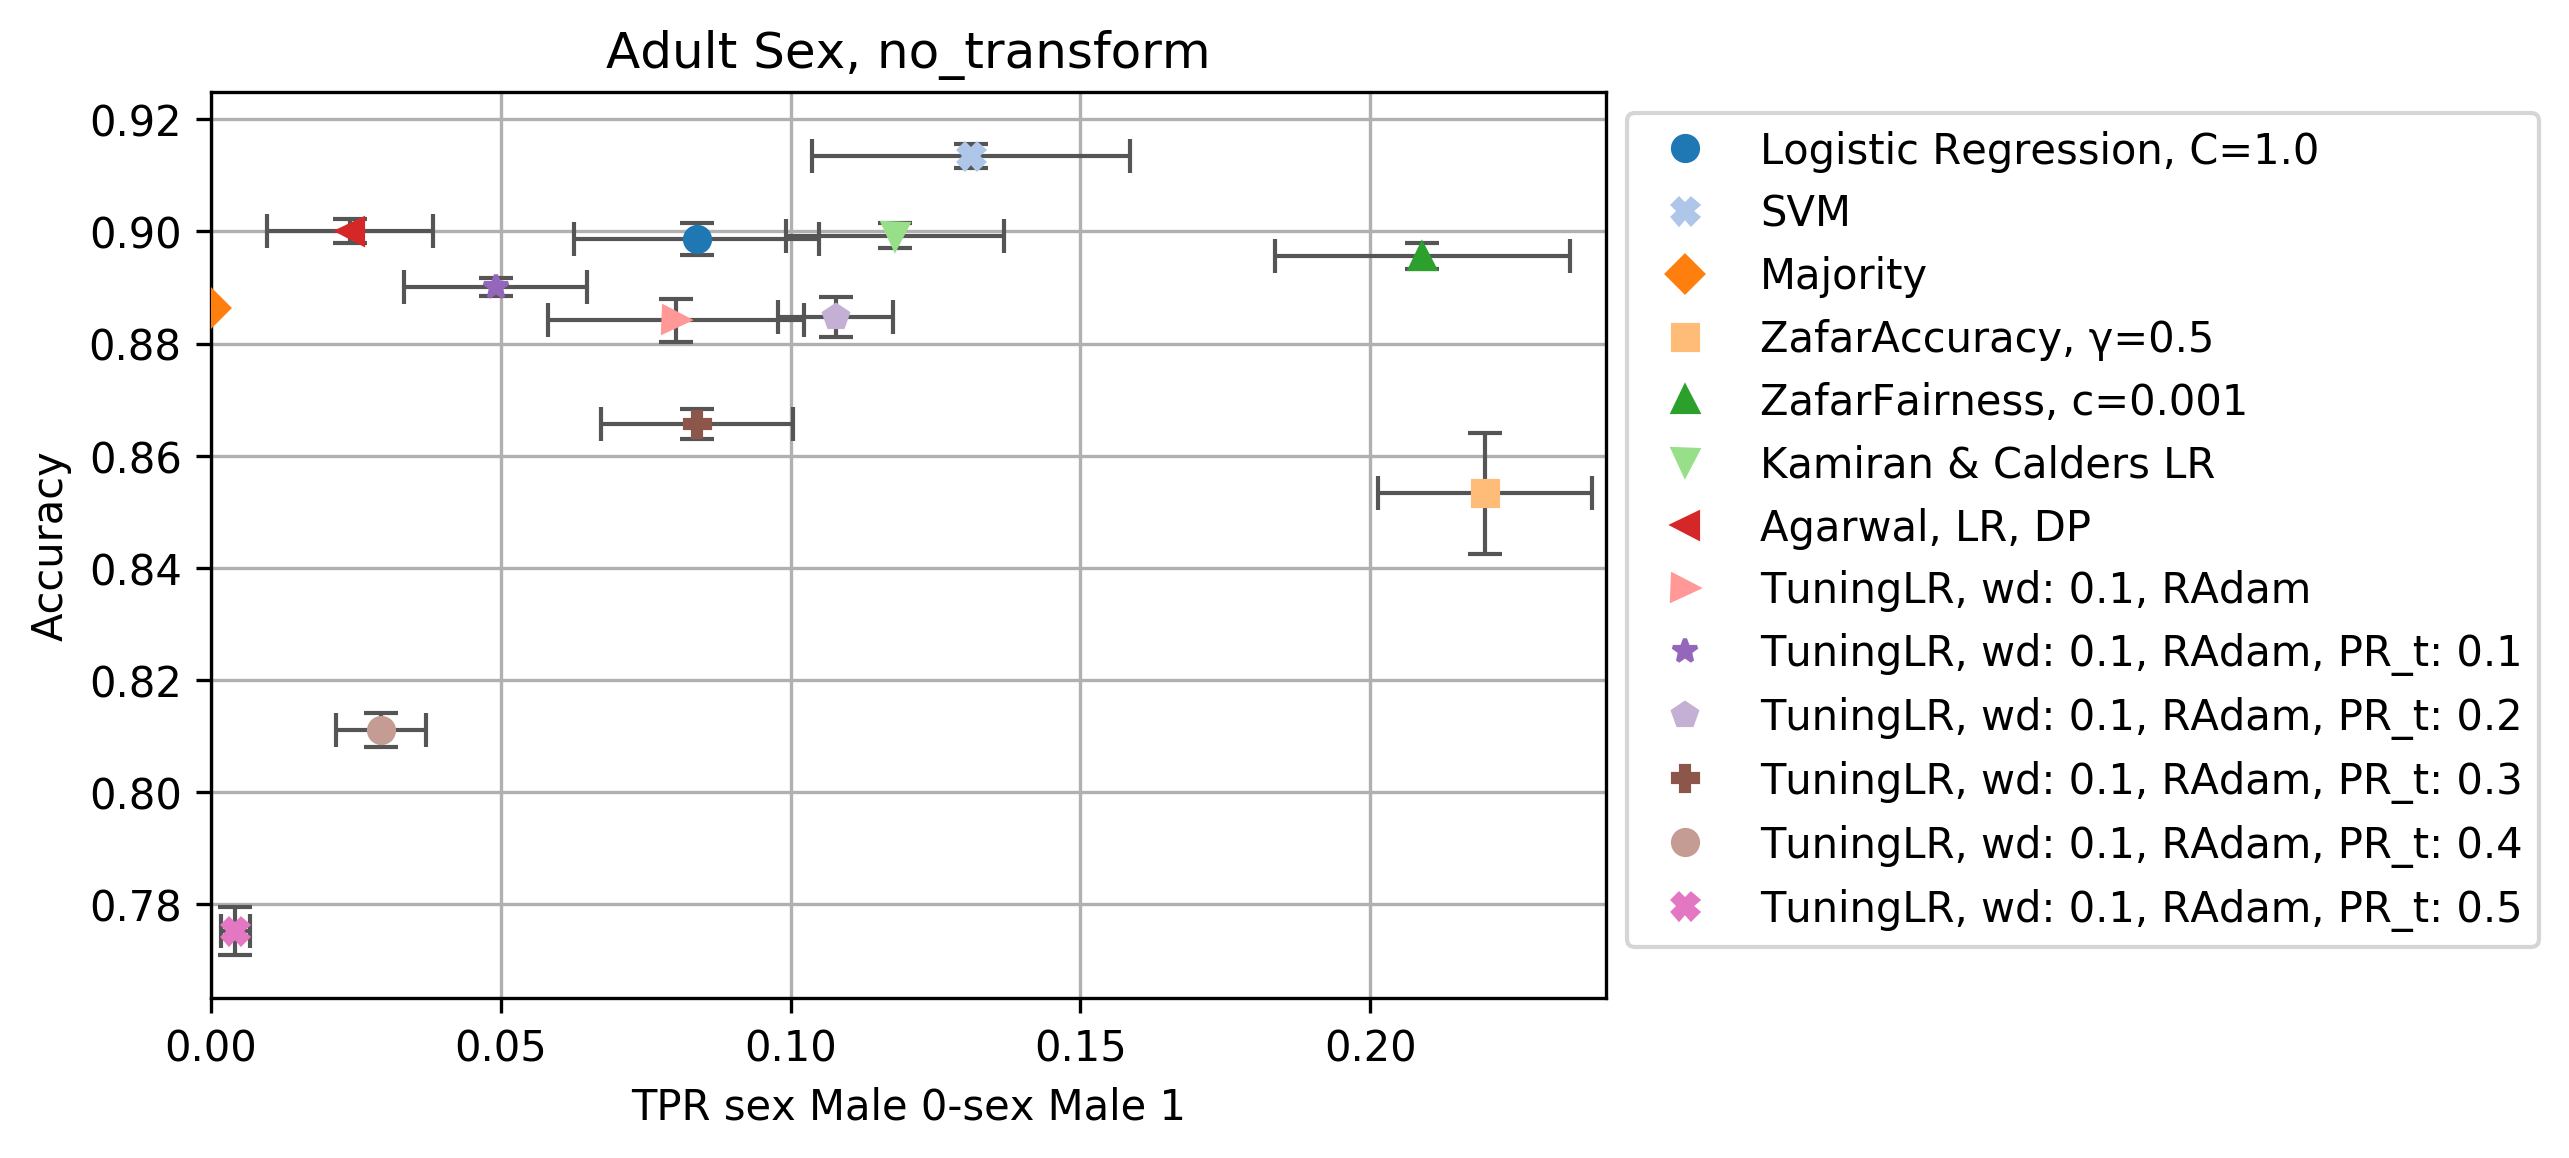

In [12]:
(fig, plot), = plot_results(results, "Accuracy", "TPR_sex_Male_0-sex_Male_1", ptype="cross")
fig

In [25]:
0.2*(0.58-0.08) + 0.08

0.18